In [174]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime
import numpy as np

In [120]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2014-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

In [121]:
panel_data.items

Index([u'Adj Close', u'Close', u'High', u'Low', u'Open', u'Volume'], dtype='object')

In [122]:
panel_data[0,0,0]

104.488365

In [123]:
panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 1259 (major_axis) x 3 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2014-12-31 00:00:00 to 2009-12-31 00:00:00
Minor_axis axis: AAPL to ^GSPC

In [124]:
del panel_data['Open']
del panel_data['Close']
del panel_data['High']
del panel_data['Low']

In [125]:
panel_data[:,:,0] # item date company

,Adj Close,Volume
Date,,
2014-12-31,104.488365,41403400.0
2014-12-30,106.514137,29881500.0
2014-12-29,107.829964,27598900.0
2014-12-26,107.905685,33721000.0
2014-12-24,106.031380,14479600.0
2014-12-23,106.533096,26028400.0
2014-12-22,106.911728,45167500.0
2014-12-19,105.813644,88429800.0
2014-12-18,106.637215,59006200.0


In [133]:
panel_data = panel_data[:,::-1,:]


In [134]:
panel_data[:,:,0] # item date company

,Adj Close,Volume
Date,,
2009-12-31,26.986492,88102700.0
2010-01-04,27.406532,123432400.0
2010-01-05,27.453915,150476200.0
2010-01-06,27.017223,138040000.0
2010-01-07,26.967278,119282800.0
2010-01-08,27.146566,111902700.0
2010-01-11,26.907093,115557400.0
2010-01-12,26.601023,148614900.0
2010-01-13,26.976244,151473000.0


In [135]:
len(panel_data[0,:,0])

1259

In [136]:
logProf = [[round(math.log(panel_data[0,i,j] / panel_data[0,i-1,j]), 4) for i in range(1,len(panel_data[0,:,j]))] for j in range(len(tickers))]


In [140]:
logProfDF = pd.DataFrame(data=logProf, index= tickers, columns= [(panel_data.axes[1][i].to_datetime().date()) for i in range(1,len(panel_data.axes[1]))])
logProfDF

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2014-12-17,2014-12-18,2014-12-19,2014-12-22,2014-12-23,2014-12-24,2014-12-26,2014-12-29,2014-12-30,2014-12-31
AAPL,0.0154,0.0017,-0.0160,-0.0019,0.0066,-0.0089,-0.0114,0.0140,-0.0058,-0.0169,...,0.0246,0.0292,-0.0078,0.0103,-0.0035,-0.0047,0.0175,-0.0007,-0.0123,-0.0192
MSFT,0.0153,0.0003,-0.0062,-0.0105,0.0069,-0.0128,-0.0066,0.0093,0.0199,-0.0032,...,0.0128,0.0382,0.0029,0.0067,0.0097,-0.0064,-0.0054,-0.0090,-0.0091,-0.0122
^GSPC,0.0159,0.0031,0.0005,0.0040,0.0029,0.0017,-0.0094,0.0083,0.0024,-0.0109,...,0.0201,0.0237,0.0046,0.0038,0.0017,-0.0001,0.0033,0.0009,-0.0049,-0.0104


In [148]:
sales = [[round(panel_data[1,i,j]/1000000, 4) for i in range(1,len(panel_data[0,:,j]))] for j in range(len(tickers))]
salesDF = pd.DataFrame(data= sales, index= tickers, columns= [(panel_data.axes[1][i].to_datetime().date()) for i in range(1,len(panel_data.axes[1]))])
print 'in millions'
salesDF

in millions


,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2014-12-17,2014-12-18,2014-12-19,2014-12-22,2014-12-23,2014-12-24,2014-12-26,2014-12-29,2014-12-30,2014-12-31
AAPL,123.4324,150.4762,138.0400,119.2828,111.9027,115.5574,148.6149,151.4730,108.2235,148.5169,...,53.4118,59.0062,88.4298,45.1675,26.0284,14.4796,33.7210,27.5989,29.8815,41.4034
MSFT,38.4091,49.7496,58.1824,50.5597,51.1974,68.7547,65.9121,51.8635,63.2281,79.9132,...,34.9709,40.1056,64.5512,26.5660,23.6481,11.4378,13.1978,14.4395,16.3847,21.5525
^GSPC,3991.4000,2491.0200,4972.6600,5270.6800,4389.5900,4255.7800,4716.1600,4170.3600,3915.2000,4758.7300,...,4942.3700,4703.3800,6465.5300,3369.5200,3043.9500,1416.9800,1735.2300,2452.3600,2440.2800,2606.0700


In [ ]:
arr = logProfDF.as_matrix()

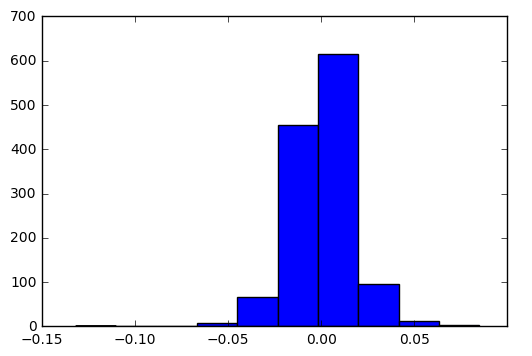

In [187]:
plt.hist(arr[0])
plt.show()

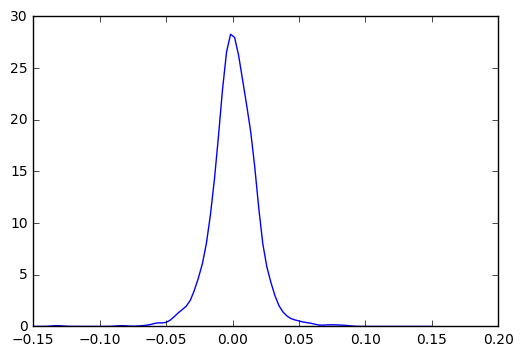

In [195]:
from scipy.stats import gaussian_kde
density = gaussian_kde(arr[0])
xs = np.linspace(-0.15,0.15,100)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

In [208]:
R = np.zeros([len(arr),len(arr)])

for i in range(len(arr)):
    for j in range(len(arr)):
    
        indX = i
        indY = j

        Ea = round(sum(arr[indX])/len(arr[indX]), 4)
        Eb = round(sum(arr[indY])/len(arr[indY]), 4)
        a = 0
        b = 0
        for k in range(len(arr[indX])):
            a = a + (arr[indX][k]-Ea)*(arr[indY][k]-Eb)
            b = b + math.sqrt( math.pow((arr[indX][k]-Ea),2) * math.pow( (arr[indY][k]-Eb), 2) )

        R[i,j] = a/b
        
R 

array([[ 1.        ,  0.56843242,  0.7837536 ],
       [ 0.56843242,  1.        ,  0.87716534],
       [ 0.7837536 ,  0.87716534,  1.        ]])

In [209]:
RDF = pd.DataFrame(data=R, index=tickers, columns=tickers)
RDF

,AAPL,MSFT,^GSPC
AAPL,1.000000,0.568432,0.783754
MSFT,0.568432,1.000000,0.877165
^GSPC,0.783754,0.877165,1.000000
